In [ ]:
# MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 5.7MB/s 


In [ ]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

In [ ]:
## making our drive our working current directory
import os
%cd /content/drive/My\ Drive/
print(os.listdir("../My Drive"))

/content/drive/My Drive
['Getting started.pdf', 'Colab Notebooks', 'Classroom', 'face_2_download.jpg', 'face_download.jpg', 'my_pic.jpg', 'faces_for_face_reconition', 'Drowsiness detection.zip (Unzipped Files)', 'emotion detection', 'EMOTION_DETECTION', 'devfest-india-certificate.pdf', 'Resume_Trupti.pdf', 'images.jpg', 'dataset for OAS', 'Java 55_Trupti satsangi.pdf', ' IT-2K18-55_Trupti satsangi.pdf', 'Cao_55_trupti satsangi.pdf', 'Ds 55_ Trupti satsangi.pdf', 'dataset for OAS.npz', 'face dataset embeddings.npz', 'Attendance sheet for OAS (1).gsheet', 'Attendance sheet for OAS.gsheet', 'Untitled form (File responses)', 'Untitled form.gform', 'Acao_55_Trupti satsangi(1).pdf', 'ADS 55_trupti satsangi.pdf', 'IT-2k18-55 (6).pdf', 'IT-2k18-55 (5).pdf', 'IT-2k18-55 (4).pdf', 'IT-2k18-55 (3).pdf', 'IT-2k18-55 (2).pdf', 'IT-2k18-55 (1).pdf', 'IT-2K18-55 (1).pdf', 'IT-2K18-55.pdf', 'IT-2k18-55.pdf', 'javalab_IT-2k18-55.pdf', 'M.tech 18 dataset', 'lab_IT-2k18-55.pdf']


In [ ]:

# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
import numpy as np

from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


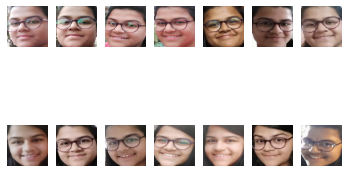

In [ ]:
 folder = 'dataset for OAS/train/TRUPTI/'
 i = 1 
for filename in os.listdir(folder):
  path = folder + filename
  face = extract_face(path)
  print(i, face.shape)
  plt.subplot(2, 7, i)
  plt.axis('off')
  plt.imshow(face)
  i += 1
plt.show()

In [ ]:
# ONLY FACES OF ONE PERSON IS EXTRACTED 

def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in os.listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

In [ ]:
# MAKING DATABASES OF ALL PEOPLE IN DATASET 
# X STORES THE IMAGES AND Y STORES THE LABELS

def load_dataset(directory):
  X,y = list(), list()
  
  # THIS LOOP ITERATES OVER TRAIN AND VAL DIRECORY
  for subdir in os.listdir(directory):
    path = directory + subdir + '/'           # PATHS FOR INDIVIDUAL PERSON
  
    faces = load_faces(path)
    # CREATING LABELS
    labels = [subdir for _ in range(len(faces))]
    print('>loaded %d examples for class: %s' % (len(faces), subdir))
    X.extend(faces)
    y.extend(labels)
  return asarray(X), asarray(y)



In [ ]:
# MAKING DATASET OF TRAIN AND TEST DATA 
# CALLING LOAD_DATSET FUNCTION

trainX,trainy = load_dataset('dataset for OAS/train/')
print(trainX.shape,trainy.shape)
# LOAD TEST DATSET
testX, testy = load_dataset('dataset for OAS/val/')
print(testX.shape,testy.shape)
# SAVE ARRAYS TO ONE COMPRESSED FILE
np.savez_compressed('dataset for OAS.npz',trainX,trainy, testX,testy)

>loaded 14 examples for class: TRUPTI
>loaded 14 examples for class: JYOTI
>loaded 14 examples for class: TANMAY
>loaded 14 examples for class: RAVINDRA
(56, 160, 160, 3) (56,)
>loaded 5 examples for class: JYOTI
>loaded 5 examples for class: RAVINDRA
>loaded 5 examples for class: TANMAY
>loaded 6 examples for class: TRUPTI
(21, 160, 160, 3) (21,)


In [ ]:
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
import tensorflow as tf
 
# get the face embedding for one face we use face_net_model
def get_embedding(face_net_model, face_pixels):

	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std 
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = face_net_model.predict(samples)
 
	return yhat[0]

In [ ]:
from keras.models import load_model     # load the face dataset
data = load('dataset for OAS.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
face_net_model = load_model('dataset for OAS/facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
  print("fp",face_pixels.shape)
  embedding = get_embedding(face_net_model, face_pixels)  
  newTrainX.append(embedding)           # CALLING get_embedding FUNCTION WHICH IS DEFINED IN THE LAST CELL
	
	
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(face_net_model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('face dataset embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (56, 160, 160, 3) (56,) (21, 160, 160, 3) (21,)
Loaded Model
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (160, 160, 3)
fp1 (160, 160, 3)
fp2 (160, 160, 3)
sample (1, 160, 160, 3)
fp (16

In [ ]:

# load dataset
data = load('face dataset embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=56, test=21


In [ ]:
from sklearn.preprocessing import Normalizer
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear',probability=True)
svm_model.fit(trainX, trainy)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
# predict
yhat_train = svm_model.predict(trainX)
yhat_test = svm_model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


(128,)
Predicted: RAVINDRA (88.095)
Expected: RAVINDRA


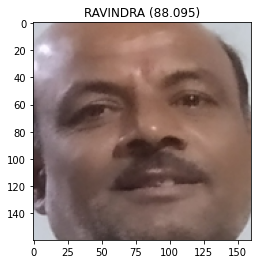

In [ ]:
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

# LOAD FACES 

data = load('dataset for OAS.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('face dataset embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# NORMALIZE  INPUT VECTOR

in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# LABEL ENCODING

out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# FIT MODEL

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(trainX, trainy)

# test model on a random example from the test dataset

selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face

samples = expand_dims(random_face_emb, axis=0)
print(random_face_emb.shape)
yhat_class = svm_model.predict(samples)
yhat_prob = svm_model.predict_proba(samples)

# get name

class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# plot for fun

pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

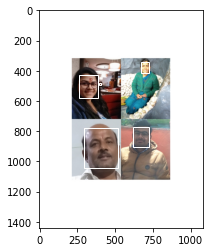

In [ ]:
from matplotlib.patches import Rectangle
from PIL import Image
from numpy import asarray
import numpy as np
image = plt.imread( "dataset for OAS/colaj.jpg")
pixels = asarray(image)
detector = MTCNN()
faces = detector.detect_faces(image)
plt.imshow(image)
ax = plt.gca()
for face in faces:
  x, y, width, height = face['box']
  face_border = Rectangle((x, y), width, height,fill=False, color='white')
  ax.add_patch(face_border)
plt.show()

In [ ]:
def extract_faces(filename, required_size=(160, 160)):
  # load image from file
  face_array =[]
  image = Image.open(filename)
  # convert to RGB, if needed
  image = image.convert('RGB')
  # convert to array
  pixels = asarray(image)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  results = detector.detect_faces(pixels)
  for result in results:
    # extract the bounding box from the first face
    x1, y1, width, height = result['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array.append(asarray(image))

  return face_array

img_pixels = extract_faces("dataset for OAS/colaj.jpg")
img_pixels

[array([[[10,  8,  9],
         [12, 10, 11],
         [11,  9, 10],
         ...,
         [46, 35, 33],
         [56, 45, 42],
         [58, 47, 43]],
 
        [[11,  9, 10],
         [10,  8,  9],
         [ 9,  7,  8],
         ...,
         [40, 29, 27],
         [40, 29, 26],
         [42, 32, 28]],
 
        [[10,  8,  9],
         [11,  9, 10],
         [11,  9, 10],
         ...,
         [37, 27, 25],
         [37, 25, 22],
         [33, 19, 16]],
 
        ...,
 
        [[15, 15, 17],
         [14, 14, 16],
         [12, 12, 14],
         ...,
         [12,  8,  5],
         [15, 11,  8],
         [15, 11,  8]],
 
        [[14, 14, 16],
         [16, 16, 18],
         [15, 15, 17],
         ...,
         [16, 12,  9],
         [17, 13, 10],
         [21, 17, 14]],
 
        [[16, 16, 18],
         [15, 15, 17],
         [11, 11, 13],
         ...,
         [26, 22, 20],
         [21, 17, 16],
         [16, 12,  9]]], dtype=uint8), array([[[202, 206, 215],
         [203, 20

In [ ]:
face_net_model = load_model('dataset for OAS/facenet_keras.h5')
all_titles = []
for test_img_pixels in img_pixels:
  face_pixels = test_img_pixels.astype('float32')
  # standardize pixel values across channels (global)
  mean, std = face_pixels.mean(), face_pixels.std()
  tface_pixels = (face_pixels - mean) / std
  emb = get_embedding(face_net_model, tface_pixels)
  # print(emb.shape)
  test_samples = np.expand_dims(emb,axis = 0)
  # print(test_samples.shape)

  test_yhat_class = svm_model.predict(test_samples)
  test_yhat_prob = svm_model.predict_proba(test_samples)
  
  class_index = test_yhat_class[0]
  class_probability = test_yhat_prob[0,class_index] * 100
  predict_names = out_encoder.inverse_transform(test_yhat_class)
  print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
  pyplot.imshow(tface_pixels)
  title = '%s (%.3f)' % (predict_names[0], class_probability)
  pyplot.title(title)
  pyplot.show()
  all_titles.append(predict_names[0])  ### changed from titles to predict_names[0]
  print()
all_titles



In [ ]:
  
all_titles

['TRUPTI', 'RAVINDRA', 'TANMAY', 'JYOTI', 'TANMAY']

In [ ]:
!pip install --upgrade gspread # FOR CONNECTING GSPREADSHEET 

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
pip install pygsheets

In [ ]:
# GETTING CREDENTIALS
from google.colab import auth
auth.authenticate_user()      

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
attendance_sheet = gc.open('OAS_SHEET').sheet1

In [ ]:
import pandas as pd
data = attendance_sheet.get_all_values()
df = pd.DataFrame(data)
df

,0,1,2,3,4,5
0,NAME,01/01/2021,02/01/2021,03/01/2021,04/01/2021,05/01/2021
1,,,,,,
2,JYOTI,p,,A,p,
3,RAVINDRA,p,,A,p,
4,TANMAY,p,,p,p,
5,TRUPTI,p,,p,p,


In [ ]:
# Get all values from the first row
row_values_list = attendance_sheet.row_values(1)
print(row_values_list)

# Get all values from the first column
col_values_list = attendance_sheet.col_values(1)
print(col_values_list)

['NAME', '01/01/2021', '02/01/2021', '03/01/2021', '04/01/2021', '05/01/2021']
['NAME', '', 'JYOTI', 'RAVINDRA', 'TANMAY', 'TRUPTI']


In [ ]:

date_c = '01/01/2021'                 # DATE ON WHICH ATTENDENCE SHOULD BE MARKED

date = attendance_sheet.find(date_c)
for title in all_titles:
  if (title in col_values_list):
    print(title in col_values_list)
    cell = attendance_sheet.find(title)
    row_number = cell.row
    attendance_sheet.update_cell(row_number,date.col ,'p')

for col in col_values_list:
  if col not in all_titles:
    row_number = attendance_sheet.find(col).row
    attendance_sheet.update_cell(row_number,date.col ,'A')

attendance_sheet.update_cell(1,date.col,date_c)
attendance_sheet.update_cell(2,date.col,"")

    

True
True
True
True
True


{'spreadsheetId': '1pxPBhsTyAX071rZdiARRnsTmvap1eX8vjeUHZa2zpuA',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Sheet1!B2',
 'updatedRows': 1}